In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *
from fastai import *

## Looking at sample data

In [ ]:
path = Path('give path for data'); path

In [4]:
# pubsamp = pd.read_csv('train_V2.csv')
# pubsamp_test = pd.read_csv('test_V2.csv')
# train_raw = pd.read_csv('train_V2.csv', nrows=10000)
# test_raw = pd.read_csv('test_V2.csv', nrows=10000)

# pubsamp.to_feather(f'{path}/train_V2')
# pubsamp_test.to_feather(f'{path}/test_V2')

In [4]:
train_raw = pd.read_feather(f'{path}/train_V2')
test_raw = pd.read_feather(f'{path}/test_V2')

In [5]:
train_raw.shape;train_raw.columns;train_raw.dtypes

(4446966, 29)

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [6]:
train_raw.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
train_raw.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


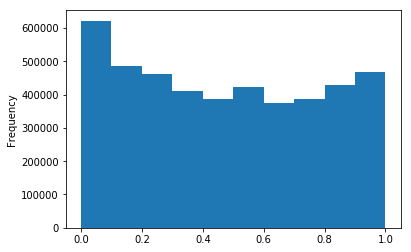

In [8]:
train_raw.winPlacePerc.plot.hist()

In [9]:
# To check if target var can be equal to 1
(train_raw.winPlacePerc == 1).sum()/train_raw.shape[0]*100

2.86876490623045

In [10]:
summ = pd.DataFrame({'Variable':train_raw.columns.values,
                   'dtype':train_raw.dtypes.values,
                   'n_missing':[train_raw[col].shape[0]-train_raw[col].dropna().shape[0] for col in train_raw.columns],
                   'perc_missing':[(train_raw[col].shape[0]-train_raw[col].dropna().shape[0])*100/train_raw[col].shape[0] for col in train_raw.columns],
                   'unique_cnt' : [len(train_raw[col].unique()) for col in train_raw.columns],
                   'unique_values': [(train_raw[col].unique()) if (len(train_raw[col].unique())<10) else 'UniqueVals>10' for col in train_raw.columns],
                    'sample_values':[(train_raw[col].unique()[:10]) for col in train_raw.columns]},
                           index=np.arange(train_raw.shape[1]))

In [11]:
summ

,Variable,dtype,n_missing,perc_missing,unique_cnt,unique_values,sample_values
0,Id,object,0,0.000000,4446966,UniqueVals>10,"[7f96b2f878858a, eef90569b9d03c, 1eaf90ac73de7..."
1,groupId,object,0,0.000000,2026745,UniqueVals>10,"[4d4b580de459be, 684d5656442f9e, 6a4a42c3245a7..."
2,matchId,object,0,0.000000,47965,UniqueVals>10,"[a10357fd1a4a91, aeb375fc57110c, 110163d8bb94a..."
3,assists,int64,0,0.000000,20,UniqueVals>10,"[0, 1, 3, 2, 4, 6, 5, 8, 9, 7]"
4,boosts,int64,0,0.000000,27,UniqueVals>10,"[0, 1, 2, 3, 4, 6, 5, 9, 7, 8]"
5,damageDealt,float64,0,0.000000,29916,UniqueVals>10,"[0.0, 91.47, 68.0, 32.9, 100.0, 8.538, 51.6, 3..."
6,DBNOs,int64,0,0.000000,39,UniqueVals>10,"[0, 1, 6, 4, 3, 2, 5, 10, 8, 7]"
7,headshotKills,int64,0,0.000000,34,UniqueVals>10,"[0, 1, 2, 3, 6, 4, 5, 8, 9, 7]"
8,heals,int64,0,0.000000,63,UniqueVals>10,"[0, 5, 2, 14, 12, 1, 8, 3, 4, 6]"
9,killPlace,int64,0,0.000000,101,UniqueVals>10,"[60, 57, 47, 75, 45, 44, 96, 48, 64, 74]"


In [38]:
summ.to_csv(f'{path}/train_summary.csv')

In [13]:
# Since 1 observation is not having target variable missing
train_raw.loc[train_raw.winPlacePerc.isna(), 'winPlacePerc'] = train_raw.winPlacePerc.median()

In [14]:
train_raw[train_raw.winPlacePerc.isna()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [15]:
# Check if match id are same in train and test sets; same for groupids
len(set(train_raw.Id) & set(test_raw.Id))
len(set(train_raw.groupId) & set(test_raw.groupId))
len(set(train_raw.matchId) & set(test_raw.matchId))
# --> So totally different matches and groups!!??

0

0

0

## Model Pre Steps

### Iter1 with less categorical variables

In [16]:
from sklearn.ensemble import RandomForestRegressor
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split

In [17]:
ignored_fds = ['Id', 'groupId', 'matchId']
train_raw.drop(labels=ignored_fds, axis=1, inplace=True)
test_raw.drop(labels=ignored_fds, axis=1, inplace=True)

In [18]:
train = pd.get_dummies(train_raw)
test = pd.get_dummies(test_raw)

X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['winPlacePerc'], axis=1), train['winPlacePerc'])

In [19]:
m = RandomForestRegressor(oob_score=True, n_estimators=100, n_jobs=7)

In [20]:
# def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def mae(x,y): return np.abs(x - y).mean()

# def print_rmse(m):
#     res = {'train_rmse':rmse(m.predict(X_train), y_train), 'val_rmse':rmse(m.predict(X_valid), y_valid),
#                 'train_r2':m.score(X_train, y_train), 'val_r2':m.score(X_valid, y_valid)}
#     if hasattr(m, 'oob_score_'): res.update({'oob_rmse' : m.oob_score_})
#     print(res)

def print_mae(m):
    res = {'train_mae':mae(m.predict(X_train), y_train), 'val_mae':mae(m.predict(X_valid), y_valid),
                'train_r2':m.score(X_train, y_train), 'val_r2':m.score(X_valid, y_valid)}
    if hasattr(m, 'oob_score_'): res.update({'oob_rmse' : m.oob_score_})
    print(res)

In [21]:
%%time
m.fit(X_train, y_train)

CPU times: user 1h 48min 18s, sys: 6.69 s, total: 1h 48min 25s
Wall time: 17min 37s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=7,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [22]:
print_mae(m)

{'train_mae': 0.02150540152175934, 'val_mae': 0.05797546465674188, 'train_r2': 0.9900783345782393, 'val_r2': 0.9295181279224627, 'oob_rmse': 0.9281606843714112}
